# Imports.

In [1]:
import pandas as pd
import numpy as np

import secrets

import plotly.graph_objects as go
import plotly.io as pio

import matplotlib.pyplot as plt

from scipy.optimize import newton

import os

from IPython import get_ipython
from IPython.display import Image, display


from comp_econ import comp_econ as ce

# Problem 1.

## 1a. Define a function to calculate y using a for loop.

In [2]:
def y_by_loop(_alpha: np.ndarray, _sigma: np.ndarray, _x: np.ndarray, _p: np.ndarray) -> tuple:
    
    r"""
    Per the problem instructions, all inputs are supposed to be drawn from a random uniform distribution,
    and all input ndarrays must have same length.

    Parameters
    ----------
    _alpha : np.ndarray
        ndarray of scalars drawn from random uniform distribution.
    _sigma : np.ndarray
        ndarray of scalars drawn from random uniform distribution.
    _x : np.ndarray
        ndarray of scalars drawn from random uniform distribution.
    _p : np.ndarray
        ndarray of scalars drawn from random uniform distribution.

    Returns
    -------
    3-tuple
        A float y_ that is the sum of all y_i's multiplied by (1/ N), where y_i = p_i * alpha_i * (x_i ** sigma_i).

        An integer N_, the length each of the input ndarrays.

        A float loop_duration_seconds_ that is the number of seconds the function took to run.
    """

    # We are told every input ndarray is of length N, but we are not told to have N as an input parameter.
    assert _alpha.shape == _sigma.shape == _x.shape == _p.shape, "All input ndarray must have same length."
    # Since all input ndarrays are of same length, pick N = _alpha.shape[0].
    N_ = _alpha.shape[0]

    # Per the instructions, run the calculation in a loop.
    y_results_list = []
    loop_start_ts = pd.Timestamp.now()
    for i in range(0, N_):
        # rng.uniform(...) returns an array of arrays. Using .flatten() here results in a float being
        # returned instead of an ndarray.
        y_i = _p.flatten()[i] * _alpha.flatten()[i] * (_x.flatten()[i] ** _sigma.flatten()[i])
        y_results_list.append(y_i)
    loop_completion_ts = pd.Timestamp.now()

    loop_duration_seconds_ = (loop_completion_ts - loop_start_ts).total_seconds()

    # (1 / N) multiplied by the sum of all y_i's.
    y_ = (1 / N_) * sum(y_results_list)
    y_ = np.round(y_, 4)



    print(f"Successfully calculated y using a for loop, then rounded to 4 digits:\n{y_}")
    print(f"Calculation in a loop took {loop_duration_seconds_} seconds.")

    return y_, N_, loop_duration_seconds_


## 1b. Draw from random uniform distribution using seeds for reproducible results, then compute y using y_by_loop(...).

In [3]:
num_draws = int(1e4)
# num_draws = 2

# Assign seeds for reproducible results.
seed_alpha = secrets.randbits(128)
print(f"seed_alpha: {seed_alpha}")

seed_sigma = secrets.randbits(128) 
print(f"seed_sigma: {seed_sigma}")

seed_x = secrets.randbits(128)
print(f"seed_x: {seed_x}")

seed_p = secrets.randbits(128)
print(f"seed_p: {seed_p}")

print(f"Performing 4 draws of length {num_draws} from random uniform distribution.")
# rng = np.random.default_rng()
# Numpy docs for seeds of random numbers.
# https://numpy.org/doc/2.3/reference/random/index.html#random-quick-start
arr_alpha = np.random.default_rng(seed_alpha).uniform(size=(num_draws, 1))
arr_sigma = np.random.default_rng(seed_sigma).uniform(size=(num_draws, 1))
arr_x = np.random.default_rng(seed_x).uniform(size=(num_draws, 1))
arr_p = np.random.default_rng(seed_p).uniform(size=(num_draws, 1))

y_1, N, loop_duration_seconds = y_by_loop(_alpha=arr_alpha, _sigma=arr_sigma, _x=arr_x, _p=arr_p)


seed_alpha: 198409423911758088756066394694743907493
seed_sigma: 165262868064524358924249828237088218306
seed_x: 2869091941141843999134354628078620604
seed_p: 267647076215612886856030341888731180972
Performing 4 draws of length 10000 from random uniform distribution.
Successfully calculated y using a for loop, then rounded to 4 digits:
0.1719
Calculation in a loop took 0.117429 seconds.


## 1c. Calculate y using only vector operations.

In [4]:
# Per the numpy documentation, the np.matrix class is no longer recommended for use. Instead, use regular arrays.
# https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
# Per the instructions, y_2 is indeed calculated in 1 line using vector operations.
vector_ops_start_ts = pd.Timestamp.now()
y_2 = np.round(((1 / N) * sum((arr_p * arr_alpha * (arr_x ** arr_sigma)))), 4)[0]
vector_ops_completion_ts = pd.Timestamp.now()
vector_ops_duration_seconds = (vector_ops_completion_ts - vector_ops_start_ts).total_seconds()

print(f"Successfully calculated y using vector operations, then rounded to 4 digits:\n{y_2}")
print(f"Vector operations took {vector_ops_duration_seconds} seconds.")


Successfully calculated y using vector operations, then rounded to 4 digits:
0.1719
Vector operations took 0.008853 seconds.


## Bonus: Check in a pandas DataFrame.

In [5]:
df_problem_1 = pd.DataFrame(data={
    'y_i': [f'y_{i}' for i in range(0, N)],
    'p': arr_p.flatten(),
    'alpha': arr_alpha.flatten(),
    'x': arr_x.flatten(),
    'sigma': arr_sigma.flatten()
    }
)
df_problem_1['y_i'] = df_problem_1['y_i'].astype('string')

df_problem_1 = df_problem_1.assign(
    y_i_value = df_problem_1['p']\
        .mul(df_problem_1['alpha'], fill_value=np.nan)\
        .mul(
            (df_problem_1['x'].pow(df_problem_1['sigma'], fill_value=np.nan)),
            fill_value=np.nan
        )
)

print("df_problem_1 info and shape:")
df_problem_1.info()
print(df_problem_1.shape)

y_3 = (1 / N) * (df_problem_1['y_i_value'].sum())
y_3 = np.round(y_3, 4)
print(f"Successfully calculated y using columns in a pandas DataFrame:\n{y_3}")

df_problem_1 info and shape:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   y_i        10000 non-null  string 
 1   p          10000 non-null  float64
 2   alpha      10000 non-null  float64
 3   x          10000 non-null  float64
 4   sigma      10000 non-null  float64
 5   y_i_value  10000 non-null  float64
dtypes: float64(5), string(1)
memory usage: 468.9 KB
(10000, 6)
Successfully calculated y using columns in a pandas DataFrame:
0.1719


In [6]:
# Display some sampled rows.
df_problem_1.sample(n=10)

,y_i,p,alpha,x,sigma,y_i_value
2078,y_2078,0.566197,0.321368,0.610818,0.622500,0.133875
2668,y_2668,0.690892,0.132210,0.792524,0.266625,0.085852
8307,y_8307,0.410869,0.487826,0.321697,0.408346,0.126135
1766,y_1766,0.906834,0.632417,0.286624,0.375171,0.358865
317,y_317,0.481946,0.095085,0.491636,0.646829,0.028951
1755,y_1755,0.387484,0.074135,0.395891,0.877459,0.012740
8691,y_8691,0.509055,0.106802,0.498836,0.397457,0.041238
4895,y_4895,0.690751,0.335443,0.576331,0.109375,0.218154
8758,y_8758,0.997074,0.174999,0.031416,0.289543,0.064065
6026,y_6026,0.968820,0.344961,0.935178,0.775209,0.317285


## Confirm that all 3 calculation procedures produced the same result.

In [7]:
print(f"y_1 = {y_1}")
print(f"y_2 = {y_2}")
print(f"y_3 = {y_3}")
assert y_1 == y_2 == y_3, "The calculations did not all produce the same result."

y_1 = 0.1719
y_2 = 0.1719
y_3 = 0.1719


## 1d. Timing for loop vs vector operations. We know that vector operations are faster.

In [8]:
loop_diff_vector_seconds = np.round((loop_duration_seconds - vector_ops_duration_seconds), 4)
print(f"Calculating y in a for loop took {loop_diff_vector_seconds} seconds longer than calculating y using vector operations.")
# seconds_pct_diff is negative because vector_ops_duration_seconds < loop_duration_seconds
# ie the vector operations were faster than the loop calculations.
seconds_pct_diff = np.round(np.abs(
    ((vector_ops_duration_seconds - loop_duration_seconds) / loop_duration_seconds) * 100
    )
)
print(f"The vector operations were {seconds_pct_diff}% faster than the loop calculation.")

Calculating y in a for loop took 0.1086 seconds longer than calculating y using vector operations.
The vector operations were 92.0% faster than the loop calculation.


# Problem 2.

## 2a. We are given Equation (1), a non-linear equation for labor supply, and told to convince ourselves it is true.

## 2b. Define function F for the first order conditions and budget constraint given in Equation (1).

In [9]:
def F(_l: np.ndarray | float,
      _W: np.ndarray | float,
      _alpha: np.ndarray | float,
      _sigma: np.ndarray | float,
      _v: np.ndarray | float,
      _psi: np.ndarray | float,
      _beta: np.ndarray | float,
      _r: np.ndarray | float
    ) -> np.ndarray | float:
    """
    Non-linear labor supply equation given in Equation (1).
    """

    # The equation requires careful typing, so let's go term by term.
    term_1 = _l ** (1 - _alpha)
    term_2 = _W
    term_3 = (1 / (_l ** ((_v + _alpha) / _sigma)))
    term_4 = ((1 - _alpha) / _psi) ** (1 / _sigma)
    term_5 = 1 + (((_beta * (1 + _r)) ** (1 / _sigma)) / (1 + _r))
    
    return term_1 + term_2 - (term_3 * term_4 * term_5)


## 2c. Plot the non-linear labor supply for different values of W.

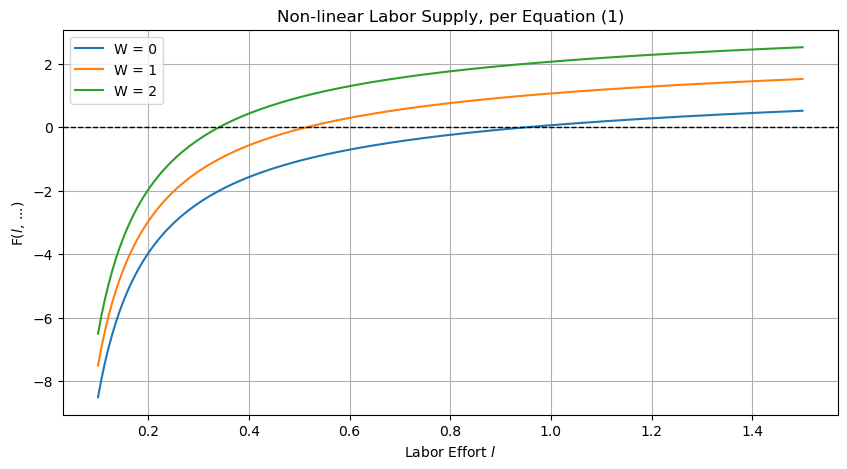

In [10]:
l = np.linspace(start=0.1, stop=1.5, num=200)
# W = 1
alpha = 0.66
v = 1.3
sigma = 2
psi = 1.5
beta = 0.98
r = 0.04

# We are told to plot 3 values of W, W = 0, 1, 2. Place these ndarrays into a list.
w_curves_list = [
    F(
        _l=l,
        _W=w,
        _alpha=alpha,
        _sigma=sigma,
        _v=v,
        _psi=psi,
        _beta=beta,
        _r=r
    ) for w in range(0, 3)
]

plt.figure(figsize=(10,5))
for num, ls in enumerate(w_curves_list):
    plt.plot(l, ls, label=f'W = {num}')
plt.title("Non-linear Labor Supply, per Equation (1)")
plt.xlabel(f"Labor Effort $l$")
plt.ylabel(f"F($l$, ...)")
plt.legend()
plt.grid(True)
# Add the line y = 0.
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

## Looking back at Equation (1), the code here is the left side of the equation and the right side of the equation is zero. Thus the equilibrium for the plotted curves occurs at y=0, which I added to the plot. Of the three curves, the curve drawn by W=0 intersects the line y=0 at an x value larger than the other two curves. This tells us that the agent will work the most at W=0, and work the least at W=2. More generally, this graph tells us that an agent works less as W increases.

## 2d. We are given Equation (2), the derivative of Equation (1) with respect to _l_, and told to convince ourselves that it is true.

# 2e. Define functions to calculate labor supply using Newton's method.

In [11]:
def dF_dl(_l: np.ndarray | float,
          _W: np.ndarray | float,
          _alpha: np.ndarray | float,
          _sigma: np.ndarray | float,
          _v: np.ndarray | float,
          _psi: np.ndarray | float,
          _beta: np.ndarray | float,
          _r: np.ndarray | float
    ) -> np.ndarray | float:
    """
    The derivative of the non-linear labor supply equation, Equation (1), with respect to l. This is Equation (2).
    """

    # Carefully type out the derivative term by term.
    term_1 = (1 - _alpha) / (_l ** _alpha)
    term_2 = (_v + _alpha) / _sigma
    term_3 = ((1 - _alpha) / _psi) ** (1 / _sigma)
    term_4 = 1 + (((_beta * (1 + _r)) ** (1 / _sigma)) / (1 + _r))
    term_5 = 1 / (_l ** (1 + ((_v + _alpha) / _sigma)))
    
    return term_1 + (term_2 * term_3 * term_4 * term_5)

def labor_supply(_l0: np.ndarray | float,
                _W: np.ndarray | float,
                _alpha: np.ndarray | float,
                _sigma: np.ndarray | float,
                _v: np.ndarray | float,
                _psi: np.ndarray | float,
                _beta: np.ndarray | float,
                _r: np.ndarray | float
            ) -> np.ndarray | float:
    """
    Use scipy.optimize.newton to solve the non-linear labor supply equation, Equation (1).
    """
    
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html
    # Per the documentation, "...The Newton-Raphson method is used if the derivative fprime of func is provided...".
    # The question provides us with func=F in Equation (1) and fprime=dF_dl in Equation (2). Thus using scipy.optimize.newton
    # satisfies the requirements of this question.
    
    # Equilibrium is at the point l* where Equation(1) = 0, ie where the curves intersect the line y=0 in the above graph from part 2c.
    l_star_ = newton(
        func=F,
        x0=_l0,
        fprime=dF_dl,
        args=(_W, _alpha, _sigma, _v, _psi, _beta, _r),
        maxiter=100,
        full_output=True
    )
    
    return l_star_

# 2f. Checking l_star for the W=2 curve.

In [12]:
# Per the question instructions, want to test the starting points l0=0.5 and l0=3 on the W=2 curve.
l0_list = [0.5, 3]
for l0 in l0_list:
    print(f"Testing starting point l0 = {l0}")
    try:
        l_star = labor_supply(
                _l0=l0,
                _W=2,
                _alpha=alpha,
                _sigma=sigma,
                _v=v,
                _psi=psi,
                _beta=beta,
                _r=r
            )
    except RuntimeError as e:
        print(e)
        print(f"Encountered RuntimeError when testing the starting point l0 = {l0}")
    else:
        print(l_star)
        # l_star should solve F(l_star, ...) = 0, approximately.
        f_l_star = F(
            _l=l_star[0],
            _W=2,
            _alpha=alpha,
            _sigma=sigma,
            _v=v,
            _psi=psi,
            _beta=beta,
            _r=r
        )
        assert np.isclose(f_l_star, 0), "f_l_star is not a solution to Equation(1)."


Testing starting point l0 = 0.5
(np.float64(0.34091210391979226),       converged: True
           flag: converged
 function_calls: 12
     iterations: 6
           root: 0.34091210391979226
         method: newton)
Testing starting point l0 = 3
Failed to converge after 100 iterations, value is nan.
Encountered RuntimeError when testing the starting point l0 = 3


C:\Users\plott\AppData\Local\Temp\ipykernel_12860\3696172881.py:15: RuntimeWarning: invalid value encountered in scalar power
  term_1 = _l ** (1 - _alpha)
C:\Users\plott\AppData\Local\Temp\ipykernel_12860\3696172881.py:17: RuntimeWarning: invalid value encountered in scalar power
  term_3 = (1 / (_l ** ((_v + _alpha) / _sigma)))
C:\Users\plott\AppData\Local\Temp\ipykernel_12860\773971812.py:19: RuntimeWarning: invalid value encountered in scalar power
  term_5 = 1 / (_l ** (1 + ((_v + _alpha) / _sigma)))


## From the code output, Newton's method converged for starting value l0=0.5 but failed for starting value l0=3. Looking at the graph from question 2c, the W=2 curve intersects the y=0 line somewhere between 0.2 and 0.4, so l0=0.5 is an okay guess for a starting point. However, l0=3 is not a good starting point since we can see that the W=2 curve does not intersect the line y=0 around l=3 along the horizontal axis.

# Bonus: Plot the W curves again, this time including the approximate intersection point of each curve with the line y=0.

In [13]:
# Look at the graph and guess the approximate l values where each curve intersects the line y=0.
# The guesses are ordered based on their corresponding W curve.
# ie good_l0_guesses[0] = 0.9 --> W=0 curve
good_l0_guesses = [
    0.9, # W=0
    0.5, # W=1
    0.3 # W=2
]

l_star_list = []
for num, l0 in enumerate(good_l0_guesses):
    print(l0)
    l_star = labor_supply(
        _l0=l0,
        _W=num,
        _alpha=alpha,
        _sigma=sigma,
        _v=v,
        _psi=psi,
        _beta=beta,
        _r=r
    )
    print(l_star)
    l_star_list.append(l_star[0])

# Now loop over the solutions and should get f_l_star approximately zero.
f_l_star_list = []
for num, l_star in enumerate(l_star_list):
    f_l_star = F(
        _l=l_star,
        _W=num,
        _alpha=alpha,
        _sigma=sigma,
        _v=v,
        _psi=psi,
        _beta=beta,
        _r=r
    )
    assert np.isclose(f_l_star, 0), "f_l_star is not a solution to Equation(1)."
    f_l_star_list.append(f_l_star)
    print(f"Solution for W={num} curve: ({l_star}, {f_l_star})")


0.9
(np.float64(0.9528625326567233),       converged: True
           flag: converged
 function_calls: 8
     iterations: 4
           root: 0.9528625326567233
         method: newton)
0.5
(np.float64(0.5149517943873635),       converged: True
           flag: converged
 function_calls: 8
     iterations: 4
           root: 0.5149517943873635
         method: newton)
0.3
(np.float64(0.3409121039197921),       converged: True
           flag: converged
 function_calls: 8
     iterations: 4
           root: 0.3409121039197921
         method: newton)
Solution for W=0 curve: (0.9528625326567233, -1.1102230246251565e-16)
Solution for W=1 curve: (0.5149517943873635, -4.440892098500626e-16)
Solution for W=2 curve: (0.3409121039197921, -2.220446049250313e-15)


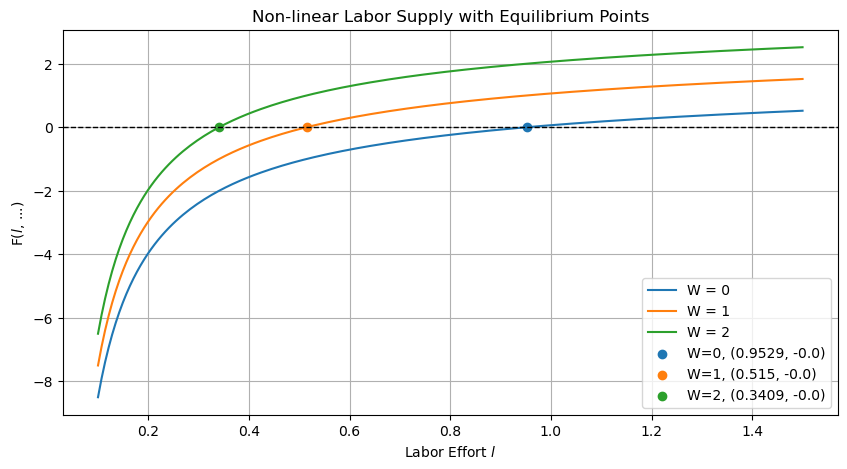

In [14]:
points_list = [np.array((l, f_l)) for l, f_l in zip(l_star_list, f_l_star_list)]

plt.figure(figsize=(10,5))
for num, ls in enumerate(w_curves_list):
    plt.plot(l, ls, label=f'W = {num}')
for num, point in enumerate(points_list):
    plt.scatter(point[0], point[1], label=f"W={num}, ({np.round(point[0], 4)}, {np.round(point[1], 4)})")
plt.title("Non-linear Labor Supply with Equilibrium Points")
plt.xlabel(f"Labor Effort $l$")
plt.ylabel(f"F($l$, ...)")
plt.legend()
plt.grid(True)
# Add the line y = 0.
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()